In [51]:
#Import the Libraries and read the data into a Pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
test = pd.read_csv("./data/california_housing_test.csv")
train = pd.read_csv("./data/california_housing_train.csv")

data = pd.concat((train, test)).reset_index(drop = True)

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
19995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
19996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
19997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
19998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [52]:

n_train = train.shape[0]
n_test = test.shape[0]
y = train['median_house_value'].values

data.drop(['longitude','latitude'], axis=1, inplace = True)

data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...
19995,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
19996,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
19997,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
19998,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [53]:
y

array([ 66900.,  80100.,  85700., ..., 103600.,  85800.,  94600.])

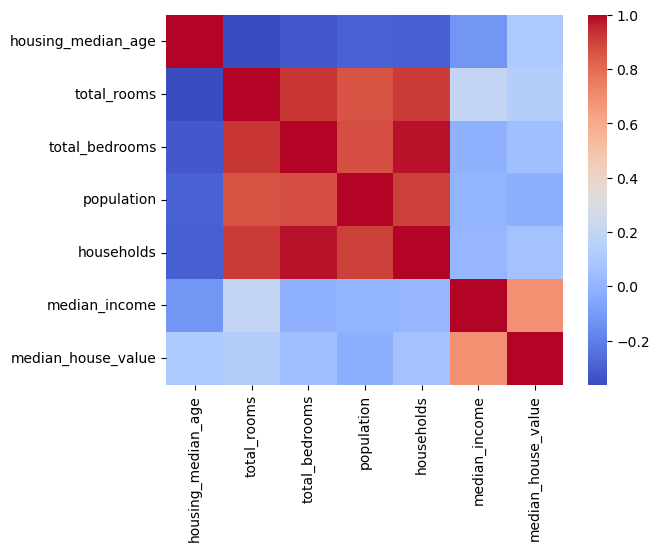

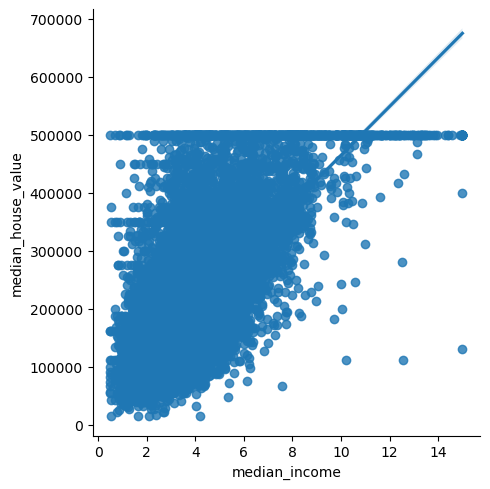

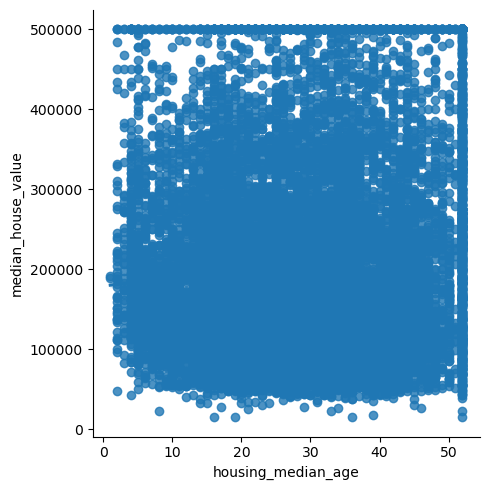

In [54]:
target_feature_name = 'median_house_value'

#Visualise the data
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()
sns.lmplot(x='median_income', y=target_feature_name, data=train)
sns.lmplot(x='housing_median_age', y=target_feature_name, data=train)

In [55]:
significant_features = [
    'total_rooms',
    'total_bedrooms',
    'housing_median_age',
    'median_income',
    'population',
    'households'
]
#Select appropriate features
data = data[significant_features]
data.info()
# preprocess the data to exclude impute missing values
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data['housing_median_age'] = data['housing_median_age'].fillna(data['housing_median_age'].mean())
data['median_income'] = data['median_income'].fillna(data['median_income'].mean())
data['population'] = data['population'].fillna(data['population'].mean())
data['households'] = data['households'].fillna(data['households'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20000 non-null  float64
 1   total_bedrooms      20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   median_income       20000 non-null  float64
 4   population          20000 non-null  float64
 5   households          20000 non-null  float64
dtypes: float64(6)
memory usage: 937.6 KB


C:\Users\walkersmith\AppData\Local\Temp\ipykernel_14932\4290794991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
C:\Users\walkersmith\AppData\Local\Temp\ipykernel_14932\4290794991.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
C:\Users\walkersmith\AppData\Local\Temp\ipykernel_14932\4290794991.py:15: SettingWithCopyWarning: 
A value is

In [56]:
train = data[:n_train]
test = data[n_train:]

train

,total_rooms,total_bedrooms,housing_median_age,median_income,population,households
0,5612.0,1283.0,15.0,1.4936,1015.0,472.0
1,7650.0,1901.0,19.0,1.8200,1129.0,463.0
2,720.0,174.0,17.0,1.6509,333.0,117.0
3,1501.0,337.0,14.0,3.1917,515.0,226.0
4,1454.0,326.0,20.0,1.9250,624.0,262.0
...,...,...,...,...,...,...
16995,2217.0,394.0,52.0,2.3571,907.0,369.0
16996,2349.0,528.0,36.0,2.5179,1194.0,465.0
16997,2677.0,531.0,17.0,3.0313,1244.0,456.0
16998,2672.0,552.0,19.0,1.9797,1298.0,478.0


In [57]:
#Split the dataset into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [58]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [59]:
# Fit the model over the training data
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

c:\Users\walkersmith\AppData\Local\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [62]:
y_pred = regressor.predict(X_test)

regressor.score(X_test, y_test)



0.6867811958943434